In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso,Ridge,RidgeCV,LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
print(df.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
print(df['sex'].value_counts().sort_values()) 
print(df['smoker'].value_counts().sort_values())
print(df['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64


In [6]:
df['sex']=df['sex'].replace({'male':1,'female':0})
df['smoker']=df['smoker'].replace({'yes':1,'no':0})
df['region']=df['region'].replace({'northeast':0, 'northwest':1, 'southeast':2, 'southwest':3})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [27]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


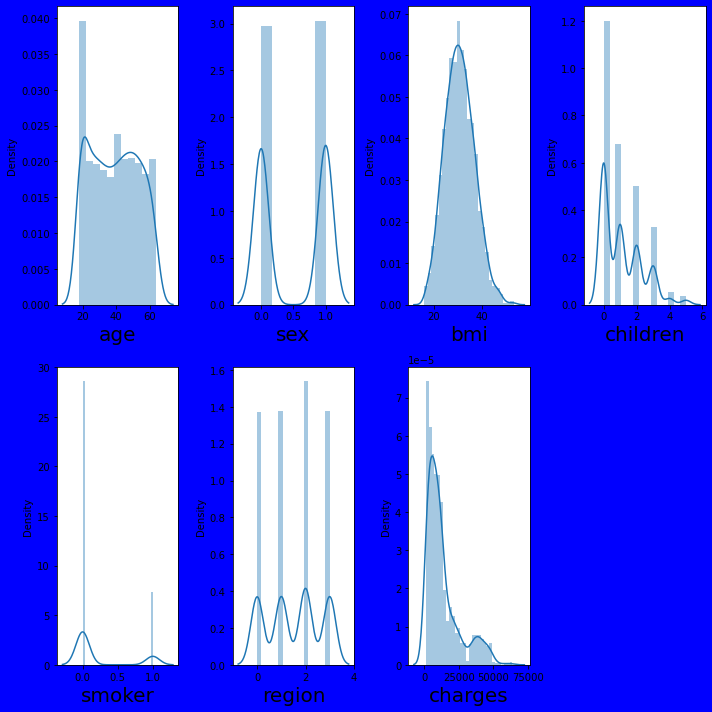

In [7]:
plt.figure(figsize=(10,10),facecolor='blue')
plotnumber=1

for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
        plt.tight_layout()

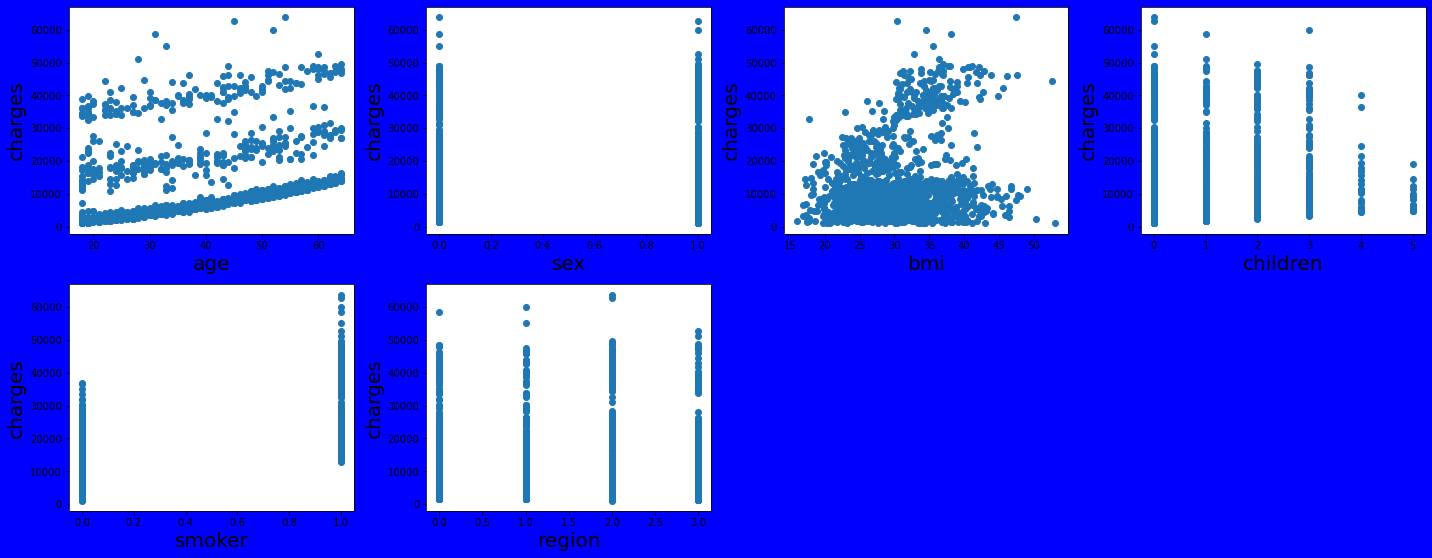

In [9]:
x=df.drop(columns=['charges'])
y=df['charges']
plt.figure(figsize=(20,15),facecolor='blue')
plotnumber=1
for column in x:
    if plotnumber<=9:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('charges',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

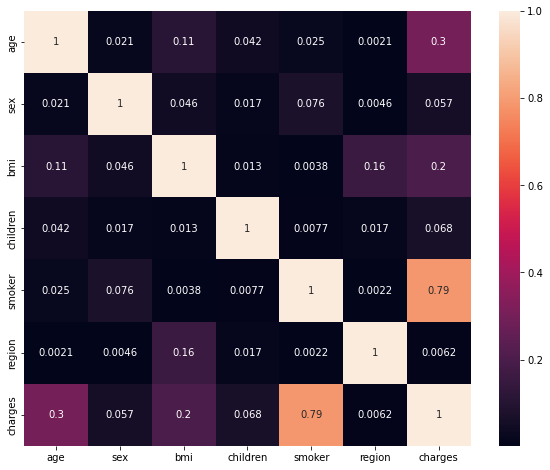

In [22]:
df_corr=df.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show

Here it can be seen Smoker, BMI and Age have highest relation

In [23]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.15,random_state=6)

In [26]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [45]:
print('Charge :',reg.predict(scaler.transform([[61,0,29.07,0,1,1]])))

Charge : [37149.27737561]


In [31]:
reg.score(x_train,y_train)

0.7491624314677312

In [32]:
reg.score(x_test,y_test)

0.7581742274145349

In [33]:
y_pred=reg.predict(x_test)

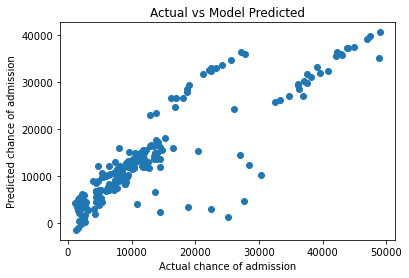

In [38]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('Predicted chance of admission')
plt.title('Actual vs Model Predicted')
plt.show()

In [39]:
y_pred=reg.predict(x_test)

In [42]:
mean_absolute_error(y_test,y_pred)

4182.487264841112

In [43]:
mean_squared_error(y_test,y_pred)

34538870.79955482

In [44]:
np.sqrt(mean_squared_error(y_test,y_pred))

5876.97803293111

In [46]:
from sklearn.linear_model import Lasso,Ridge,RidgeCV,LassoCV
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [47]:
alpha=lasscv.alpha_
alpha

1.8548553042608746

In [48]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.8548553042608746)

In [49]:
lasso_reg.score(x_test,y_test)

0.7581884693255349

In [50]:
ridgecv=RidgeCV(alphas=np.arange(0.002,0.1,0.02),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.002, 0.022, 0.042, 0.062, 0.082]), normalize=True)

In [51]:
ridgecv.alpha_

0.002

In [52]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.002)

In [53]:
ridge_model.score(x_test,y_test)

0.7581742311648364

Lasso is giving highest accuracy

In [54]:
pickle.dump(reg,open('Medical Insurance','wb'))